In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import astropy.io.ascii
from scipy.optimize import curve_fit
from scipy.signal import lombscargle as ls
import numpy as np
from scipy.optimize import curve_fit
import math

# Reading Data

This is the data for planet HD 189733 b.

In [2]:
with open("189_rad.txt", "r") as f_in:
     rad_vel = []
     for line in f_in:
             # remove \n character at the end
             line = line.strip()
             # split it into 3 columns
             line = line.split()
             # add to data
             rad_vel.append(line)
     # first 3 rows are literally worthless
     rad_vel = rad_vel[3:]

# Data is like a table of rows, each row has 3 columns
# Values are strings, we parse them to floats
bjd1 = [float(row[0]) for row in rad_vel]
radial_velocity = [float(row[1]) for row in rad_vel]
radial_velocity_uncertainty = [float(row[2]) for row in rad_vel]

dataframe_dict1 = {"bjd": bjd1, "radial_velocity": radial_velocity, "radial_velocity_uncertainty": radial_velocity_uncertainty}
rad_vel_df = pd.DataFrame(data=dataframe_dict1)
rad_vel_df

,bjd,radial_velocity,radial_velocity_uncertainty
0,2.452833e+06,-13.964,1.542
1,2.452899e+06,186.717,1.480
2,2.453181e+06,153.226,1.609
3,2.453241e+06,121.542,1.139
4,2.453304e+06,-202.928,1.244
...,...,...,...
81,2.453969e+06,-58.550,0.715
82,2.453969e+06,-69.951,0.771
83,2.453969e+06,-79.481,0.754
84,2.453969e+06,-95.622,0.750


In [3]:
with open("189_photo.txt", "r") as f_in:
     photo = []
     for line in f_in:
             line = line.strip()
             line = line.split()
             photo.append(line)
     photo = photo[5:]

bjd2 = [float(row[0]) for row in photo]
magnitude = [float(row[1]) for row in photo]
magnitude_uncertainty = [float(row[2]) for row in photo]
data_quality_flag = [float(row[3]) for row in photo]
accepted_int = [float(row[3]) for row in photo]

dataframe_dict2 = {"bjd": bjd2, "magnitude": magnitude, "magnitude_uncertainty": magnitude_uncertainty, "data_quality_flag": data_quality_flag,"accepted_int": accepted_int}
photo_df = pd.DataFrame(data=dataframe_dict2)
photo_df

,bjd,magnitude,magnitude_uncertainty,data_quality_flag,accepted_int
0,2.453898e+06,1.0056,0.0024,1.0,1.0
1,2.453898e+06,1.0059,0.0024,1.0,1.0
2,2.453898e+06,1.0034,0.0024,1.0,1.0
3,2.453898e+06,0.9969,0.0024,1.0,1.0
4,2.453898e+06,0.9984,0.0024,1.0,1.0
...,...,...,...,...,...
194,2.453898e+06,0.9984,0.0015,1.0,1.0
195,2.453898e+06,0.9988,0.0015,1.0,1.0
196,2.453898e+06,1.0018,0.0015,1.0,1.0
197,2.453898e+06,1.0026,0.0015,1.0,1.0


# Finding Period

In [ ]:
with open("189_rad.txt", "r") as f_in:
     rad_vel = []
     for line in f_in:
             # remove \n character at the end
             line = line.strip()
             # split it into 3 columns
             line = line.split()
             # add to data
             rad_vel.append(line)
     # first 3 rows are literally worthless
     rad_vel = rad_vel[3:]

# Data is like a table of rows, each row has 3 columns
# Values are strings, we parse them to floats
bjd1 = [float(row[0]) for row in rad_vel]
radial_velocity = [float(row[1]) for row in rad_vel]
radial_velocity_uncertainty = [float(row[2]) for row in rad_vel]

dataframe_dict1 = {"bjd": bjd1, "radial_velocity": radial_velocity, "radial_velocity_uncertainty": radial_velocity_uncertainty}
rad_vel_df = pd.DataFrame(data=dataframe_dict1)
rad_vel_df

In [ ]:
RV=rad_vel_df['radial_velocity']-np.mean(rad_vel_df['radial_velocity'])
rvbjd=rad_vel_df['bjd']

plt.plot(rvbjd,RV,'.k')

In [ ]:
max(RV)-min(RV)

In [ ]:
P1=np.linspace(1.,5.,50)

#write function
def freq(P):
    """
    Converts periods to frequencies. Expects 1 input:
    (1) a numpy array of periods
    
    Uses the formula freq=2pi/P to obtain angular frequencies
    """
    omega=2*np.pi/P
    return omega

#test function
test=freq(2*np.pi) #should return 1
print(test)
print('and it does! I can use this function for later things.')

In [ ]:
freq1=freq(P1) #make array of frequencies to plug into periodogram
ls1=ls(rvbjd,RV,freq1)

fig, ax=plt.subplots()
ax.semilogx(freq1,ls1)
ax.semilogx(freq1[50:300],ls1[50:300])
ax.set_xlabel('angular frequency')
ax.set_ylabel('power')
ax.set_title('periodogram with frequencies')

In [ ]:
fig, ax=plt.subplots()
ax.semilogx(P1,ls1)
ax.set_xlabel('Period')
ax.set_ylabel('power')
ax.set_title('periodogram with periods')
fig.show()

In [ ]:
d=np.argmax(ls1)
f=freq1[d]
P=2*np.pi/f
print(P,'days') 

# Calculating Planet Radius

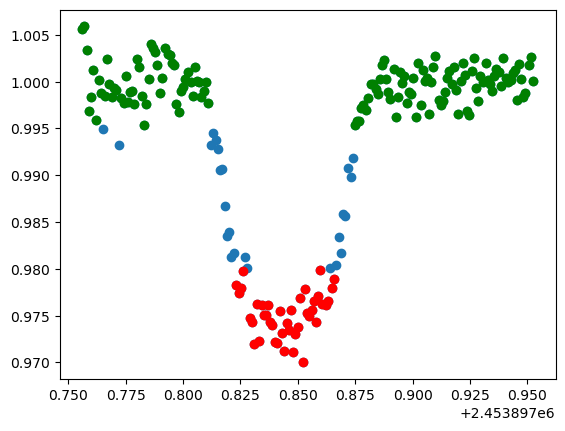

In [4]:
plt.scatter(photo_df['bjd'], photo_df['magnitude'])
plt.scatter(photo_df['bjd'][photo_df['magnitude']<=0.98], photo_df['magnitude'][photo_df['magnitude']<=0.98], color = 'red')

plt.scatter(photo_df['bjd'][photo_df['magnitude']>=0.995], photo_df['magnitude'][photo_df['magnitude']>=0.995], color = 'green')

In [6]:
trans_error = np.array(photo_df['magnitude_uncertainty'][photo_df['magnitude']<=0.98])
out_error = np.array(photo_df['magnitude_uncertainty'][photo_df['magnitude']>=0.995])
in_trans = np.array(photo_df['magnitude'][photo_df['magnitude']<=0.98])
out_trans = np.array(photo_df['magnitude'][photo_df['magnitude']>=0.995])

rng = np.random.default_rng() #initialize random number generator
mag_samp=[rng.normal(loc=in_trans[i],scale=trans_error[i]) for i in range(len(in_trans))] #randomize data

In [27]:
radii = []

for k in range(5):
    np.random.normal()
    
    # In trans
    mag_samp_trans=[np.random.normal(loc=in_trans[j],scale=trans_error[j]) for j in range(len(in_trans))] #randomize data
    
    # Out trans
    mag_samp_out=[np.random.normal(loc=out_trans[j],scale=out_error[j]) for j in range(len(out_trans))] #randomize data
    
    # Averages
    in_trans_avg = np.mean(mag_samp_trans)
    out_trans_avg = np.mean(mag_samp_out)
    
    # Transit depth
    trans_depth = (out_trans_avg - in_trans_avg) / out_trans_avg
    
    # Star radius (in km)
    star_radius = 0.765 * 696340 
    
    # Radius equation
    planet_rad = (trans_depth**(1/2) * star_radius)/69911
    print(planet_rad)
    
    radii.append(planet_rad)

print(radii)

1.2029575414653721
1.1990505012480226
1.20641667069066
1.199357952462056
1.188732709622685
[1.2029575414653721, 1.1990505012480226, 1.20641667069066, 1.199357952462056, 1.188732709622685]


In [28]:
rad_avg = np.mean(radii)
rad_std = np.std(radii)

print(rad_avg)
print(rad_std)

1.1993030750977591
0.005928875071085189


# Calculating Planet Mass

In [35]:
mp_j = 1.1477121953139102
m_un_j = 0.0146465183
mp_g = mp_j * 1.898 * 10**(30)
m_un_g = m_un_j * 1.898 * 10**(30)

# Calculating Planet Density

In [36]:
rad_cm = rad_avg * 66854*100000
rad_un_cm = rad_std * 66854*100000

In [39]:
rho_list = []
for j in range(50):
    m_samp = np.random.normal(loc=mp_g, scale=m_un_g)
    r_samp = np.random.normal(loc=rad_cm, scale=rad_un_cm)
    rho = m_samp / (4/3 * np.pi * r_samp**3)
    rho_list.append(rho)
print(rho_list)

[1.0209179261597867, 0.9657686724019354, 1.0070678090126655, 0.979987743808052, 1.0324120800267047, 1.020983709783497, 0.9932569825341376, 0.983418797092535, 1.0116497347629216, 0.970799216730518, 1.0415734071994707, 1.0160776353204635, 1.0106914806276632, 0.978561108247886, 1.01710586147181, 1.005282694722167, 1.079438667856059, 1.005605083745275, 1.0193908752772776, 1.0356582674452475, 1.014347834377591, 0.9936447368975725, 1.0215438376619121, 1.0213449807798591, 1.0142764337462713, 0.9889950233601583, 0.997711589156882, 0.9872147943237903, 0.9895252289402113, 0.9752558912393706, 1.0101903882051786, 1.0109967729586309, 1.0337645088217784, 1.0083635157356896, 1.0253065211926717, 0.9873378361185038, 0.9981584962392784, 1.0224405238736403, 1.0001305899483677, 1.014264688380492, 1.0149163574591753, 1.0223670787676986, 1.0274319224701896, 1.0034011532502458, 1.0093946434093601, 1.026842087407935, 1.004937920882372, 1.0088372290800034, 1.0031705145826957, 0.9974222840604637]


In [40]:
rho_avg = np.mean(rho_list)
rho_err = np.std(rho_list)
print("The density is", rho_avg, "+/-", rho_err, "g/cm^3.")

The density is 1.0085836627510814 +/- 0.019894021174722904 g/cm^3.


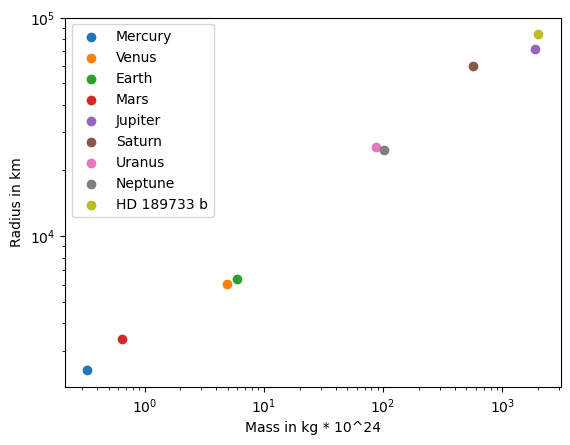

In [17]:
Mercury = [0.33010, 2440.5]
Venus = [4.8673, 6051.8]
Earth = [5.9722, 6378.1]
Mars = [0.64169, 3396.2]
Jupiter = [1898.13, 71492]
Saturn = [568.32, 6378.1]
Uranus = [86.811, 25559]
Neptune = [102.409, 24764]
HD_189733_b = [2000.17850695, 83844.47728]

plt.scatter(0.33010, 2440.5, label='Mercury')
plt.scatter(4.8673, 6051.8, label='Venus')
plt.scatter(5.9722, 6378.1, label='Earth')
plt.scatter(0.64169, 3396.2, label='Mars')
plt.scatter(1898.13, 71492, label='Jupiter')
plt.scatter(568.32, 60268, label='Saturn')
plt.scatter(86.811, 25559, label='Uranus')
plt.scatter(102.409, 24764, label='Neptune')
plt.scatter(2000.17850695, 83844.47728, label='HD 189733 b')
plt.xscale('log')  # Set y-axis to log scale
plt.yscale('log')  # Set y-axis to log scale
plt.xlabel("Mass in kg * 10^24")
plt.ylabel("Radius in km")
plt.legend()
plt.show()